<a href="https://colab.research.google.com/github/jonglees/Codon-optimisation-practical/blob/main/rf_optimise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The biotech company you work for has a peptide therapeutic that it selling so well they can't make enough of it. They would like to be able to make more of this peptide using a novel microbial expression system. They suspect that codons of the mRNA sequence are not optimal. The companies experimental team have tried traditional codon optimisation (replacing codons with the most frequent ones) but the protein expression levels don't change. You suggest in a meeting to your companies CEO trying machine learning. They agree and give you the experimental teams initial dataset of different synonymous sequences and protein expression values...good luck !!


# Download training data

In [1]:
!wget https://raw.githubusercontent.com/jonglees/Codon-optimisation-practical/refs/heads/main/mRFP_Expression_train_valid.csv

--2025-12-13 17:17:49--  https://raw.githubusercontent.com/jonglees/Codon-optimisation-practical/refs/heads/main/mRFP_Expression_train_valid.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869855 (849K) [text/plain]
Saving to: ‘mRFP_Expression_train_valid.csv’

mRFP_Expression_tra 100%[===================>] 849.47K  --.-KB/s    in 0.07s   

2025-12-13 17:17:50 (11.7 MB/s) - ‘mRFP_Expression_train_valid.csv’ saved [869855/869855]



In [2]:

!head mRFP_Expression_train_valid.csv

,Sequence,Value
0,AUGGCAUCAUCAGAAGACGUCAUAAAAGAAUUUAUGCGAUUCAAAGUCCGCAUGGAAGGGUCAGUAAACGGACACGAAUUCGAAAUCGAAGGAGAAGGAGAAGGCCGCCCAUACGAAGGUACCCAAACAGCCAAACUAAAAGUAACUAAAGGCGGACCACUCCCCUUCGCCUGGGACAUCCUCUCGCCCCAGUUCCAGUACGGGUCUAAAGCCUACGUCAAGCACCCCGCCGAUAUUCCGGAUUAUCUGAAACUAUCGUUUCCAGAGGGUUUUAAAUGGGAGCGGGUAAUGAAUUUUGAAGACGGAGGGGUAGUAACUGUUACUCAAGACUCAUCUCUGCAGGAUGGUGAAUUUAUCUAUAAGGUCAAACUACGAGGCACCAACUUCCCGUCGGACGGACCAGUCAUGCAAAAAAAAACCAUGGGUUGGGAGGCUUCUACCGAACGCAUGUACCCCGAGGACGGCGCGCUCAAAGGCGAGAUCAAGAUGCGUCUCAAACUCAAGGACGGAGGUCAUUAUGAUGCGGAAGUUAAGACUACUUACAUGGCAAAGAAACCAGUCCAACUACCGGGAGCAUAUAAAACUGACAUAAAGCUUGAUAUUACGUCGCAUAAUGAGGAUUACACUAUUGUGGAGCAGUAUGAGCGGGCCGAGGGCCGGCAUUCUACCGGUGCGUGA,10.164760474265888
1,AUGGCGUCUUCAGAGGAUGUAAUCAAGGAAUUCAUGCGUUUUAAGGUGCGGAUGGAAGGUUCGGUAAACGGACAUGAGUUUGAAAUCGAAGGAGAAGGCGAGGGACGCCCGUAUGAGGGUACGCAAACGGCUAAACUUAAGGUUACUAAGGGUGGUCCGCUGCCCUUCGCCUGGGAUAUUCUAUCGCCCCAAUUUCAAUAUGGGUCAAAGGCGUACGUUAAACAUCCUGCCGAUAUACCGGACUACCUGAAACUGUCAUUUCCGGAGGGAUUCAAGUGGGAA

In [3]:
import pandas as pd
df = pd.read_csv('mRFP_Expression_train_valid.csv')

In [4]:
df

,Unnamed: 0,Sequence,Value
0,0,AUGGCAUCAUCAGAAGACGUCAUAAAAGAAUUUAUGCGAUUCAAAG...,10.164760
1,1,AUGGCGUCUUCAGAGGAUGUAAUCAAGGAAUUCAUGCGUUUUAAGG...,10.572869
2,2,AUGGCAUCAUCGGAAGAUGUAAUAAAGGAAUUUAUGCGUUUCAAAG...,9.766912
3,3,AUGGCGAGUAGUGAAGACGUUAUCAAAGAAUUUAUGCGUUUUAAGG...,9.926981
4,4,AUGGCUUCUUCUGAGGACGUAAUAAAGGAGUUCAUGAGGUUCAAGG...,9.857074
...,...,...,...
1235,1235,AUGGCGAGCAGUGAAGACGUUAUUAAGGAAUUUAUGCGCUUCAAGG...,9.785832
1236,1236,AUGGCAUCGUCGGAAGACGUGAUAAAGGAAUUCAUGCGGUUUAAAG...,9.451459
1237,1237,AUGGCCAGUAGUGAAGAUGUGAUUAAAGAAUUUAUGCGCUUCAAAG...,10.760540
1238,1238,AUGGCAAGCAGCGAAGACGUGAUUAAGGAAUUCAUGCGUUUUAAGG...,9.603192


# Train a Random Forest on the Data

You start with your task and decide to use a RandomForest model. Using the following prompt "# prompt: Using dataframe df: train a random forest" you ask the AI model Gemini to write your initial starting code 🙂 framework ("see below")....But when you run the code it doesnt work, 😞 can you see whats wrong ?

In [5]:
# prompt: Using dataframe df: train a random forest
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df['Sequence']  # Assuming you want to use the sequence as input
y = df['Value']

# Convert sequences to numerical representations using a simple approach: sequence length
X = [sequence for sequence in X]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit sklearn requirements
X_train = [[val] for val in X_train]
X_test = [[val] for val in X_test]


# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust hyperparameters
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model (example: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


ValueError: could not convert string to float: 'AUGGCUUCAUCGGAAGAUGUAAUCAAAGAGUUUAUGCGAUUUAAGGUCCGCAUGGAGGGAUCUGUCAACGGGCACGAAUUUGAAAUUGAAGGAGAAGGGGAGGGGCGCCCAUAUGAGGGCACUCAAACCGCUAAACUCAAGGUAACGAAGGGCGGACCUCUUCCUUUCGCCUGGGACAUUCUCUCACCUCAAUUCCAAUAUGGCUCCAAGGCGUAUGUUAAACACCCGGCCGACAUACCGGAUUACCUGAAACUUUCAUUUCCGGAAGGAUUUAAAUGGGAACGUGUGAUGAACUUUGAAGAUGGUGGUGUUGUUACCGUAACCCAAGAUUCAUCGCUGCAGGAUGGGGAAUUUAUAUAUAAGGUAAAACUCCGAGGUACAAAUUUCCCAUCCGAUGGACCGGUCAUGCAAAAAAAGACCAUGGGAUGGGAAGCUUCAACAGAGCGGAUGUAUCCGGAGGAUGGCGCACUGAAGGGCGAAAUAAAAAUGCGUCUUAAGCUAAAGGACGGGGGACAUUACGAUGCCGAGGUAAAAACGACUUAUAUGGCGAAGAAACCGGUCCAGCUGCCAGGGGCGUACAAAACGGACAUAAAACUGGACAUCACGUCUCAUAAUGAGGACUAUACGAUAGUAGAGCAGUAUGAGCGGGCUGAGGGUCGGCACUCUACCGGGGCAUGA'

# Solution

You realise that Machine learning methods like random forests only accept number encoded inputs. You set about writing some code to 'One hot encode' your RNA sequence..Give this 20 to 30 minutes..If you are stuck you can see a solution below.

#Ready to train our model

Your making good progress and thinking about your swimming pool after your shiney ML method get's you a promotion 😴.... back to work your ready to train your model....But when you run the following code the performance is OK.. but not quite what you had hoped for 😞....Give yourself 20-30 minutes to Optimise the model.. Further documentation can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
# Prepare the data
# Prepare the data
X = df['Sequence']  # Assuming you want to use the sequence as input
mapping = {'A':0, 'C':1, 'G':2, 'U':3}

int_encoded = np.array(
    [[mapping[b] for b in s] for s in df["Sequence"]]
)

X = np.eye(4, dtype=int)[int_encoded].reshape(len(df), -1)
y = df['Value']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



classifiers = {

    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(max_depth=5, n_estimators=50)
}
for name, clf in classifiers.items():
  r2_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
  print(name)


  print(f"Mean R-squared: {r2_scores.mean():.4f}")


  # Train the model on the training data
  clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred_test = clf.predict(X_test)

  # Evaluate the model on the test set

  # R-squared
  r2 = r2_score(y_test, y_pred_test)
  print(f"Test R-squared: {r2:.4f}")

  # Mean Squared Error
  mse = mean_squared_error(y_test, y_pred_test)
  print(f"Test Mean Squared Error: {mse:.4f}")

  # Pearson Correlation
  pearson_corr, _ = pearsonr(y_test, y_pred_test)
  print(f"Test Pearson Correlation: {pearson_corr:.4f}")

  # Spearman Correlation
  spearman_corr, _ = spearmanr(y_test, y_pred_test)
  print(f"Test Spearman Correlation: {spearman_corr:.4f}")

Dummy
Mean R-squared: -0.0071
Test R-squared: -0.0057
Test Mean Squared Error: 0.5634
Test Pearson Correlation: nan
Test Spearman Correlation: nan


/tmp/ipython-input-2046583204.py:63: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = pearsonr(y_test, y_pred_test)
/tmp/ipython-input-2046583204.py:67: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(y_test, y_pred_test)


Decision Tree
Mean R-squared: 0.0864
Test R-squared: 0.2870
Test Mean Squared Error: 0.3994
Test Pearson Correlation: 0.6465
Test Spearman Correlation: 0.6212
Random Forest
Mean R-squared: 0.5410
Test R-squared: 0.5426
Test Mean Squared Error: 0.2562
Test Pearson Correlation: 0.7401
Test Spearman Correlation: 0.7625


# Final Steps checking on the hidden test set

The CEO is happy with your work but asks a famous ML expert who works with teh company to get their best performance on the dataset they report back with PEARSON=0.7 on this final hidden test set...try to write the code to do this.Did you do better than Pearson=0.7 ? If so congratulations!! 🎉 .... If not dont worry you've done a great job anyway 👏

In [70]:
"""First download this test dataset"""
!wget https://raw.githubusercontent.com/jonglees/Codon-optimisation-practical/refs/heads/main/mRFP_Expression_test.csv

--2025-12-13 19:05:36--  https://raw.githubusercontent.com/jonglees/Codon-optimisation-practical/refs/heads/main/mRFP_Expression_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153862 (150K) [text/plain]
Saving to: ‘mRFP_Expression_test.csv.1’

mRFP_Expression_tes 100%[===================>] 150.26K  --.-KB/s    in 0.03s   

2025-12-13 19:05:36 (4.52 MB/s) - ‘mRFP_Expression_test.csv.1’ saved [153862/153862]



In [71]:
"""Now produce predictions on this test set and report pearson and spearmann correlations"""
df_test = pd.read_csv('mRFP_Expression_test.csv')

In [ ]:
# @title Example Answer

df_test['one_hot_encoded_seqs']=[one_hot_encode(seq) for seq in df_test.Sequence]
X_test_hidden = list(df_test['one_hot_encoded_seqs'])  # Assuming you want to use the sequence as input
y_test_hidden = list(df_test['Value'])

# Make predictions on the test set
y_pred_hidden = model.predict(X_test_hidden)



# Evaluate the model (example: Pearson Correlation)
corr = pearsonr(y_test_hidden, y_pred_hidden)
print("Pearson corr:", corr)


# One last thing...

You decide to do some bioinformatics exploration of the data. You remember from your MSc its possible to look at which features in the input the random forest finds most useful: help https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html. Combinine your ML and Bio skills to explore the dataset a bit more...basic research like this is as key to industry as it is to academia.

What are your take-homes about important regions of the sequence expression?

<Axes: >

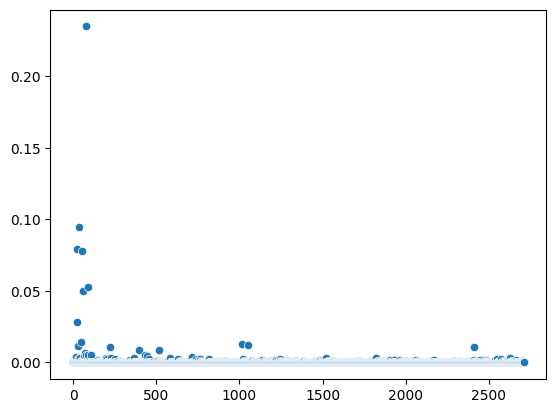

In [73]:
# @title Example Answer
import seaborn as sns
dna_positions=[]
importance_scores=[]
for dna_position, importance in enumerate(model.feature_importances_):
    dna_positions.append(dna_position)
    importance_scores.append(importance)
sns.scatterplot(x=dna_positions, y=importance_scores)




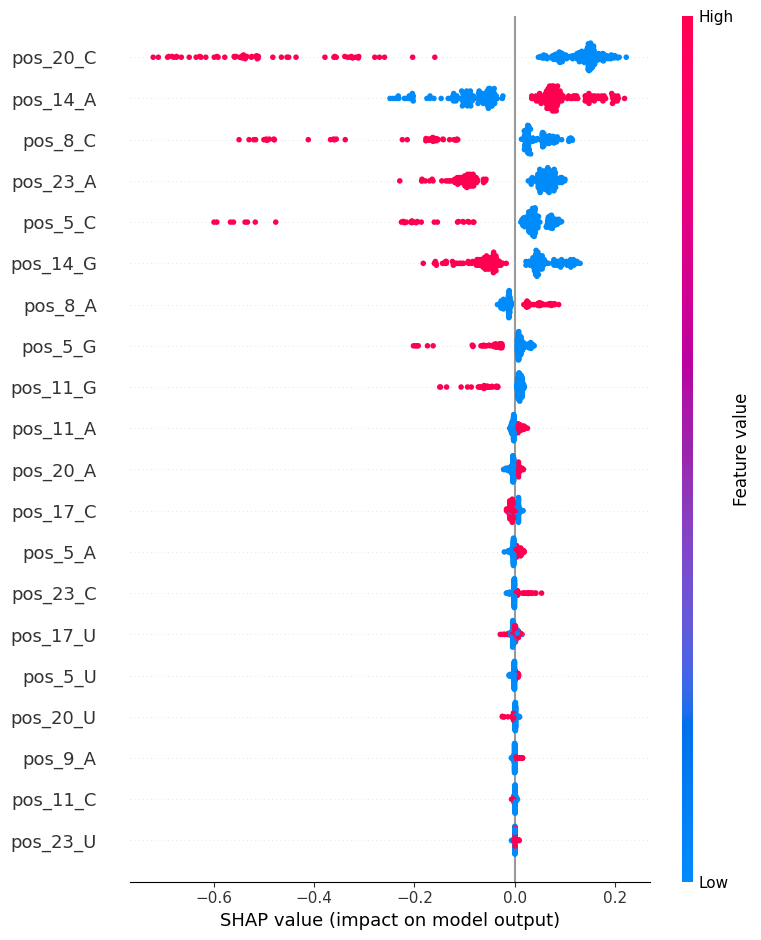

Displaying SHAP summary plot for the first 100 features.


In [81]:
import shap
import numpy as np

# Assuming 'model' is your trained RandomForestRegressor from previous steps
# and 'X_train' is your one-hot encoded training data.

# Create a SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
X_sample = X_test

shap_values = explainer.shap_values(X_sample)

# Plot the SHAP summary for the first 100 features
# SHAP values are typically a list of arrays for multi-output models, but for regression it's usually a single array
# If it's a list, we take the first element (assuming single regression output)
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Ensure we don't try to plot more features than available
num_features_to_plot = min(100, X_sample.shape[1])

# Create dummy feature names for better interpretation (e.g., 'pos_0_A', 'pos_0_C', etc.)
def get_feature_names(num_features):
    names = []
    nucleotides = ['A', 'C', 'G', 'U']
    for i in range(num_features // 4):
        for nt in nucleotides:
            names.append(f'pos_{i}_{nt}')
    return names

feature_names = get_feature_names(X_train.shape[1])[:num_features_to_plot]

# Create a DataFrame for SHAP values to include feature names for the plot
shap_df = pd.DataFrame(shap_values[:, :num_features_to_plot], columns=feature_names)

# Create a plot using shap.summary_plot
shap.summary_plot(shap_values[:, :num_features_to_plot], X_sample[:, :num_features_to_plot], feature_names=feature_names)

print(f"Displaying SHAP summary plot for the first {num_features_to_plot} features.")